In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [22]:
# ----Part 1---- 
# Question a)
# Image path
data_dir = "./"

# Basic Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",# assgin the label based on the folder names "damge, no damage"
    label_mode = "int",
    validation_split = 0.2, 
    subset= "training",
    seed = SEED,
    image_size = IMG_SIZE, 
    batch_size = BATCH_SIZE
)
    
# validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Save the Class 
class_names = train_ds.class_names
print("Class names:", class_names)


Found 21322 files belonging to 2 classes.
Using 17058 files for training.
Found 21322 files belonging to 2 classes.
Using 4264 files for validation.
Class names: ['damage', 'no_damage']


In [23]:
# Question B)
# Checking the Image and Label Size
for images, labels in train_ds.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    sample_img = images[0]
    break

Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)


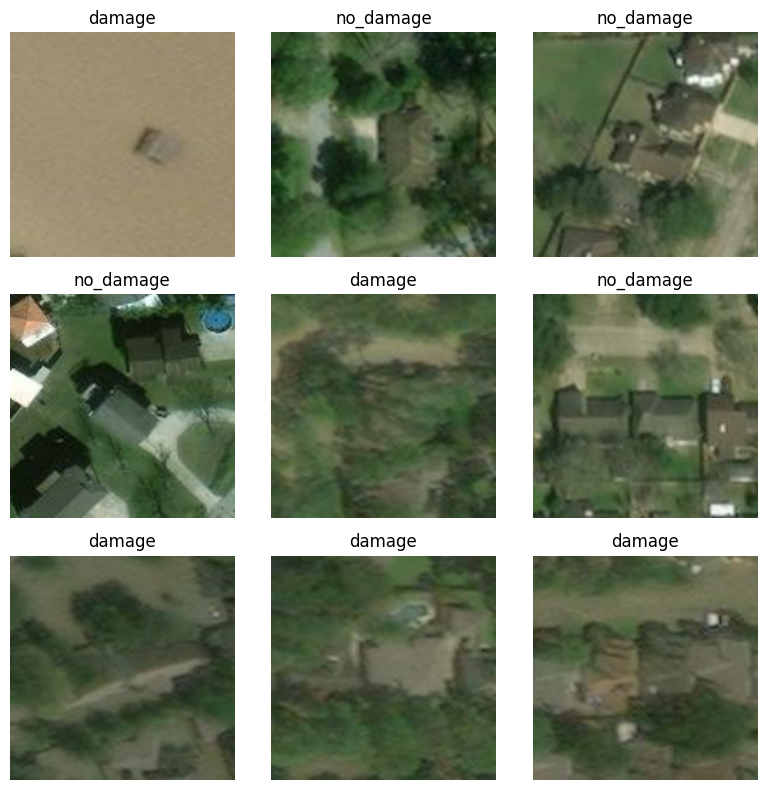

In [15]:
plt.figure(figsize=(8,8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.tight_layout()
plt.show()


In [18]:
# Check Pixel Intensity range(for Normalization)
print("Pixel range:", np.min(sample_img.numpy()), "to", np.max(sample_img.numpy()))

Pixel range: 13.862356 to 158.51021


In [20]:
# count how many image per class
import glob
counts = {cls: len(glob.glob(os.path.join(data_dir, cls, "*"))) for cls in class_names}
print("Image counts per class:", counts)


Image counts per class: {'damage': 14170, 'no_damage': 7152}


In [29]:
val_batches = tf.data.experimental.cardinality(val_ds) # counts how many batchers are inside a val_ds
test_ds = val_ds.take(val_batches // 2) # give half of the bathes to the test 
val_ds  = val_ds.skip(val_batches // 2) # half of to the validation

In [32]:
# Normalization
normalization_layer = tf.keras.layers.Rescaling(1./255)
def normalize(images, labels):
    return normalization_layer(images), labels

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)
test_ds = test_ds.map(normalize)

In [33]:
for images, labels in train_ds.take(1):
    print("Image shape:", images.shape)
    print("Pixel range (after normalization):", tf.reduce_min(images).numpy(), "-", tf.reduce_max(images).numpy())


Image shape: (32, 224, 224, 3)
Pixel range (after normalization): 0.0 - 0.003921569
